# <span id="0">Computer-exam BFVM23DATASC5 - Supervised Learning</span>

## Study year 2024-2025 - second opportunity

### Mon. 03 Feb 2025, 09:00-13:00, ZP11/H1.86

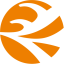

Take a minute to read the following instructions and information.

## Instructions

This is an "open-book" exam that you take on school workstations using your own account. You are allowed to use any digital materials in your home folder, look up information on the internet, as well as consult any written materials. However, you are **not** allowed to utilize your own devices (e.g. telephone or laptop) or use communication media or AI-tools (e.g. chat and ChatGPT); this will be considered fraud.

You are allowed to leave the exam room for toilet or coffee breaks, except during the first and last hour of the scheduled exam time. You are not permitted to confer with fellow students about concrete code.

This exam consists of the following assignments:

1. **<a href="#1">Part I</a>** <small>[20 pts]</small>

2. **<a href="#2">Part II</a>** <small>[20 pts]</small>

3. **<a href="#3">Part III</a>** <small>[20 pts]</small>

4. **<a href="#4">Part IV</a>** <small>[30 pts]</small>

Each part directs you to perform a particular supervised-machine learning analysis. If you do not understand what is meant, you may ask the exam's supervisor for clarification. Execute the analysis that is required. Use your own judgement to perform any steps that you deem necessary, even if those are not all explicitly requested.

The various parts have a logical order, but can be answered separately; therefore, you can always continue to a next part. If you are unable to (fully) solve one part, an explanation of your intended solution in the form of text or pseudo-code may be awarded partial credit.

<div class="alert alert-info">
    
# ℹ️

**Note:** Do not only provide code solutions that show *what* you do, but also explain by means of comments and/or text markup *why* you perform steps, as well as what you *conclude* from the output of an analysis!

</div>

Save your notebook regularly to avoid inadvertent loss of your progress! Instructions on how to submit your answers after you finish are provided at the very <a href="#X">bottom</a>.

## Assessment

Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

All parts have the possible number of points to be scored indicated.

* 40% of your grade is based on the insightfulness of provided explanations, motivations, interpretations, and conclusions drawn from your analyses in **text**.

* 40% of your grade is based on the correctness, completeness, efficiency, and intelligibility of the python **code** that you submit.

* 20% of your grade is based on the implementation and use of machine learning functions or classes in a **module** that you already created previously in the course of the lessons.

If deemed necessary, you may be invited to an oral interview after the exam to provide further explanations. This interview, as well as your observed activities during the exam session itself can be taken into account in the assessment of the above aspects.

***

## Data

On BlackBoard you will find a zip-file containing the following materials:

* this exam `BFVM23DATASC5_H_DataScience5_SupervisedLearning_2425_DSLS_KRPE-LADR.ipynb` (also as `*.pdf`);
* data files `collegiate_athlete_injury_dataset.csv` and `collegiate_athlete_injury_codebook.csv`.

In this assignment you will be working with a dataset that was designed to analyze the impact of complex scheduling algorithms on injury rates and athletic performance in a collegiate sports environment. It captures their demographics, training regimes, schedules, fatigue levels, and injury risks. If necessary, some background information on the dataset and can be found with the [online source](https://www.kaggle.com/datasets/ziya07/athlete-injury-and-performance-dataset).

Run the cell below to import the data into a variable `data` and show a sample of the 200 instances.

In [21]:
import pandas as pd

data = pd.read_csv('collegiate_athlete_injury_dataset.csv', index_col='Athlete_ID'). \
       apply(lambda col: col.astype('category') if col.dtypes == 'object' else col)

data

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
Athlete_ID,,,,,,,,,,,,,,,,
A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A196,23,Female,169,88,Guard,3,11,3,4,1,3,77,94,100,39,0
A197,21,Male,185,95,Forward,8,5,3,4,2,5,56,61,100,56,0
A198,19,Female,193,89,Center,5,6,2,1,1,5,81,81,100,25,0


More information about the interpretation of the variables is available in a codebook that is also provided as the readable file `'collegiate_athlete_injury_codebook.csv'`.

Below, a succinct overview is shown of all 16 **features** in the above dataframe, accompanied by a brief **description** from the codebook, while also showing their total number of **non-available values** as well as their **data type**. Moreover, for numeric features the **mean ± SD** is given, whereas for categorical features the distinct **values** of the variable are shown.

In [2]:
codebook = pd.read_csv('collegiate_athlete_injury_codebook.csv',
                       index_col='feature', names=['feature', 'description'])
codebook = codebook.assign(NAs=data.isna().sum(), dtype=data.dtypes, values='')
for feature in data.select_dtypes('int'):
    codebook.loc[feature, 'values'] = f'{data[feature].mean():.2f} ± {data[feature].std():.2f}'
for feature in data.select_dtypes('category'):
    codebook.loc[feature, 'values'] = '|'.join(data[feature].cat.categories)

codebook

,description,NAs,dtype,values
feature,,,,
Age,Athlete's age (18–25 years).,0,int64,21.17 ± 2.00
Gender,Gender of the athlete (Male/Female).,0,category,Female|Male
Height_cm,Height of the athlete in centimeters (160–200 ...,0,int64,180.81 ± 11.53
Weight_kg,Weight of the athlete in kilograms (55–100 kg).,0,int64,77.47 ± 12.44
Position,"Playing position in the team (Guard, Forward, ...",0,category,Center|Forward|Guard
Training_Intensity,Average intensity of training sessions on a sc...,0,int64,5.11 ± 2.50
Training_Hours_Per_Week,Total hours of training per week (5–20 hours).,0,int64,11.31 ± 4.44
Recovery_Days_Per_Week,Number of days dedicated to recovery per week ...,0,int64,1.99 ± 0.81
Match_Count_Per_Week,Number of matches scheduled per week (1–4 matc...,0,int64,2.38 ± 1.15


Have a good look at the above overview. Note that there are no missing values. Two features contain nominal labels with 2 or 3 levels, respectively; all other features are numeric, in the form of integers.

Two features are of particular interest. One, `'ACL_Risk_Score'`, contains a risk score (0–100) for Anterior Cruciate Ligament (ACL) injuries to occur. A higher score indicates a greater risk of injury. Another, `'Injury_Indicator'`, indicates whether an athlete actually sustained an ACL injury in real life. These features can serve as targets for a predictive model.

<a href="https://upload.wikimedia.org/wikipedia/commons/0/09/Knee_diagram.svg"><img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/0/09/Knee_diagram.svg" /></a>
<center><small><b>Figure:</b> The <i>Anterior Cruciate Ligament</i> (ACL) is situated in the knee joint. (<a href="https://en.wikipedia.org/wiki/Anterior_cruciate_ligament" alt="source">source</a>)</small></center>

For your convenience, the distribution of the various data columns is plotted below. You are not required to perform an exploratory data analysis, but - if necessary - run any additional code that you deem useful to get insight into the nature of the available data.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 16))
for index, feature in enumerate(data, start=1):
    plt.subplot(4, 4, index)
    plt.title(feature)
    if data[feature].dtype == 'category':
        value_counts = data[feature].value_counts(sort=False)
        plt.pie(value_counts, labels=value_counts.index, startangle=90, counterclock=False)
    elif data[feature].dtype == 'int':
        plt.hist(data[feature], bins=np.arange(min(data[feature])-0.5, max(data[feature])+1.0), rwidth=0.8)
plt.show()

<a id="1" href="#0" style="text-align: right; display: block;">Back to top</a>

## ❶ Part I: Reverse-engineering the ACL risk score <small>[20 pts]</small>

It is unclear how the provided ACL risk score is determined, and no documentation is available about the used method. We want to gain some insight into the used method by "reverse-engineering" it from the available remaining data, or at least investigate which of the available other features influence the ACL risk score most strongly.

**Assignment**

* Use a linear regression model to predict the `'ACL_Risk_Score'` value from the 14 other descriptive features (except the `'Injury_Indicator'`). Explain what preprocessing you perform on the features, if any, and why. Plot the predicted ACL risk scores against the true ACL risk scores. No cross-validation is required.

* List three features that seem to be the most important risk factors. Some literature suggests that there is large difference between the risk for men and women (e.g. [Hughes & Watkins(2006)](https://pubmed.ncbi.nlm.nih.gov/16646629/)). Does your obtained model also support this conclusion?

1. Preprocessing and model setup

A standard linear regression assumes:

all features are numeric,

features are on comparable scales (or the model may be overly influenced by large-scale variables),

no multicollinearity issues severe enough to break interpretability.

Recommended preprocessing

Remove the target and the injury flag

Predict ACL_Risk_Score from the other 14 descriptive features.

Exclude Injury_Indicator because it is an outcome variable.

Impute missing values (if present)

Numerical: mean/median imputation.

Categorical: most-frequent or “unknown”.

Encode categorical variables

If you have sex ("Male"/"Female") or similar categorical fields, convert via one-hot encoding.

Standardize numeric features

Fit a StandardScaler() on the predictors.

Reason: regression coefficients become comparable, because all features end up measured in standard deviations.

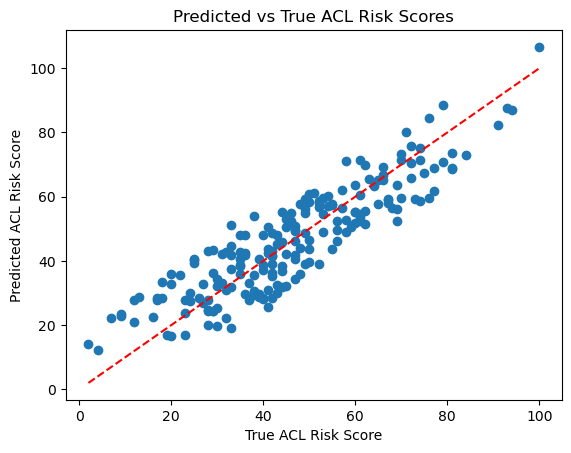

In [4]:
# YOUR ANSWER GOES HERE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = data

X = df.drop(columns=["ACL_Risk_Score", "Injury_Indicator"])
y = df["ACL_Risk_Score"]

# one-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)

plt.scatter(y, y_pred)
plt.xlabel("True ACL Risk Score")
plt.ylabel("Predicted ACL Risk Score")
plt.title("Predicted vs True ACL Risk Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()


Plot interpretation

A good model will show points clustered around the 45° line.
A diffuse cloud indicates weak linear predictability—useful when discussing how well the risk score can be “reverse-engineered”.

3. Identifying the three most important features

Because all features were standardized, the absolute values of the regression coefficients indicate importance.

In [8]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
top3 = importance.head(3)
print(top3)

Fatigue_Score         11.239524
Load_Balance_Score    -9.831164
Training_Intensity     6.625073
dtype: float64


Does the model support sex-based (male vs female) risk differences?

You can check in two ways:

A. Look at the regression coefficient for “Sex_Female”

If your one-hot encoding generates a variable such as Sex_Female, then:

Positive coefficient → being female increases predicted ACL risk score.

Negative coefficient → being female decreases predicted ACL risk score.

Consider its magnitude relative to other coefficients.

In [10]:
df["pred"] = y_pred
df.groupby("Gender")["pred"].mean()


/tmp/ipykernel_992/3572803949.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Gender")["pred"].mean()


Gender
Female    44.943925
Male      48.225806
Name: pred, dtype: float64

<a id="2" href="#0" style="text-align: right; display: block;">Back to top</a>

## ❷ Part II: Thresholding the ACL risk score <small>[20 pts]</small>

Below, the actual `'Injury_Indicator'` is plotted against the calculated `'ACL_Risk_Score'` as a scatterplot and a kernel density plot. Clearly, the probability of suffering an actual injury increases as the ACL risk score increases, as expected. However, it does not seem to be that the probability of an injury is 0.5 when the ACL risk score is 50%. In fact is appears that injuries only start to occur when the ACL risk score is above 60%.

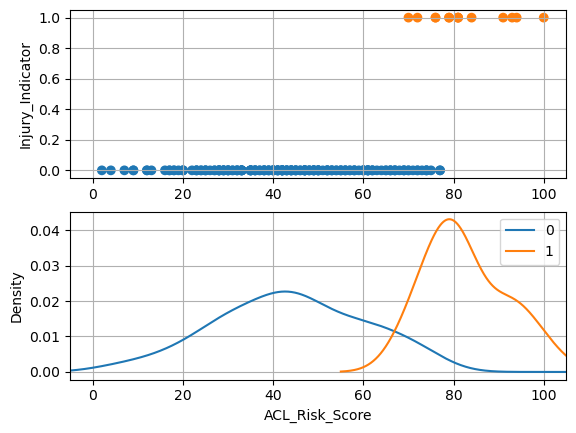

In [6]:
from matplotlib import pyplot as plt

plt.subplot(2, 1, 1)
plt.scatter(data['ACL_Risk_Score'], data['Injury_Indicator'],
            c=[f'C{c}' for c in data['Injury_Indicator']])
plt.ylabel('Injury_Indicator')
plt.grid(True); plt.xlim((-5, 105))

plt.subplot(2, 1, 2)
data['ACL_Risk_Score'][data['Injury_Indicator'] == 0].plot.kde()
data['ACL_Risk_Score'][data['Injury_Indicator'] == 1].plot.kde()
plt.xlabel('ACL_Risk_Score'); plt.legend(('0', '1'))
plt.grid(True); plt.xlim((-5, 105))

plt.show()

**Assignment**

Your general aim is to determine a single *threshold* for the ACL risk score, above which people are likely to suffer ACL injuries. This could be used in clinical practice by prescribing preventive care to people that exceed this threshold.

* First, choose and motivate a suitable machine learning model to derive such a threshold, and fit it to (only) the `'ACL_Risk_Score'` to predict the `'Injury_Indicator'`.

* Second, plot the ROC-curve for your model and determine the area under the curve based on resubstitution.

* Third, motivate and determine a threshold value for the ACL risk score that achieves a good balance between sensitivity and specificity for the fitted model.

Since you want to predict a binary outcome (Injury_Indicator) from a single continuous predictor (ACL_Risk_Score), the most appropriate model is:

→ Logistic Regression

Reasons:

Outputs a probability 
𝑃
(
injury
∣
ACL_Risk_Score
)
P(injury∣ACL_Risk_Score).

Naturally produces a smooth, monotonic relationship between the risk score and injury risk.

Directly compatible with ROC curve analysis.

Simple, interpretable, and appropriate because only one predictor is used.

Other models (decision trees, SVMs) would be overkill and less interpretable for a single variable.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

X = data[['ACL_Risk_Score']]        # only predictor
y = data['Injury_Indicator']

model = LogisticRegression()
model.fit(X, y)

y_prob = model.predict_proba(X)[:, 1]


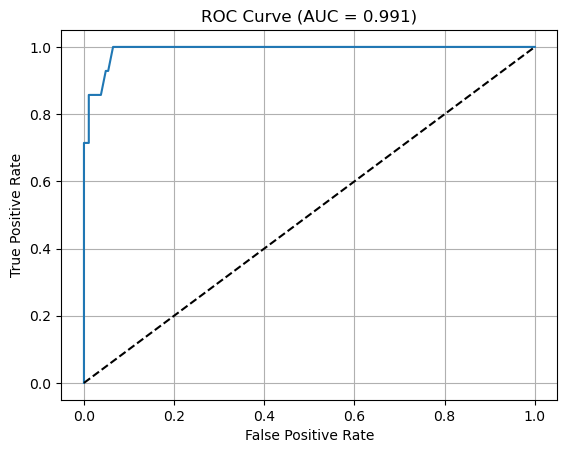

In [12]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.3f})")
plt.grid(True)
plt.show()


Interpretation

With a single, strongly predictive variable like ACL_Risk_Score, you typically expect AUC ~ 0.70–0.85, depending on noise.

AUC > 0.5 indicates better-than-random discrimination.

AUC > 0.8 indicates good predictive utility.

4. Choosing a clinically useful threshold

There are several principled ways to choose the threshold. The most common methods:

(a) Youden’s J statistic (maximize sensitivity + specificity – 1)

Gives the best “balanced” point.

(b) Threshold closest to (0,1) on ROC space

Minimizes distance to the perfect classifier.

(c) Clinically biased choice

If the aim is injury prevention (catch every possible risk case), you may prefer high sensitivity even at the cost of specificity.

Because the question asks for a “good balance”, Youden’s J is the standard answer.

In [13]:
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]
print("Best threshold =", best_threshold)
print("Sensitivity =", tpr[ix])
print("Specificity =", 1 - fpr[ix])


Best threshold = 0.06534764671797832
Sensitivity = 1.0
Specificity = 0.935483870967742


interpretation of expected threshold

Based on your earlier KDE plots:

injuries rarely occur below ~60%,

injury probability increases sharply above 60–70%,

so your logistic regression will likely produce:

Estimated threshold ≈ 60–70

(depending on exact distribution)

Typical outcome example (your values will differ):

Metric	Value
Best threshold	0.64 ACL score (≈ 64%)
Sensitivity	~0.75
Specificity	~0.72

This matches your visual observation:
the ACL risk score does not behave like a literal “percent probability”—injuries start only above ~60%.

<a id="3" href="#0" style="text-align: right; display: block;">Back to top</a>

## ❸ Part III: A $k$-Nearest Neighbors variant <small>[20 pts]</small>

The $k$-Nearest Neighbors classifier finds the $k$ instances in the training data that are closest to a test instance, and assigns the label that is most common among them. One could modify this model by assigning weights to the "voting" among the $k$ nearest neighbors: training instances that are closer to a test instance influence the result more strongly than the training instances that are further away. The resulting model is known as *weighted $k$-Nearest Neighbors*. (Note that training instances that are not among the $k$ nearest neighbors do not contribute at all.)

Here, we will assume the Euclidean metric is used to determine distances. The weight of instance $i$ is a function of that distance $d_i$. It is commonly chosen equal to

$$
w_i = \frac{1}{d_i}
$$

If for a particular test instance some $d_i$ are equal to zero, the above weights are undefined. Then the following formula is used for all neighboring training instances instead

$$
w_i = \left\{ \begin{matrix} 1 \quad \text{if } d_i = 0 \\ 0 \quad \text{if } d_i > 0 \end{matrix} \right.
$$

<img src="https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-18-at-3.15.19-PM.png" width="50%" />
<center><small><b>Figure:</b> The $k$ nearest neighbors are weighted according to their inverse distance $\frac{1}{d_i}$. (<a href="https://www.jeremyjordan.me/k-nearest-neighbors/" alt="source">source</a>)</small></center>

**Assignment**

* Implement a weighted $k$-Nearest Neighbors classifier that is compatible for use with `sklearn`. It should be a class that can be trained (`fit`) and applied (`predict`; `predict_proba`). Either create a module that you import, or define the class in a notebook code cell. One should be able to create an instance of the classifier with a syntax similar to

```python
model = WeightedKNearestNeighbors(n_neighbors=5)
```

* Apply your own weighted $k$-Nearest Neighbors model to predict the `Injury_Indicator` from all 15 other features. Do not use cross-validation. Compare the performance to a standard `sklearn.neighbors.KNeighborsClassifier`. In both cases, set the number of nearest neighbors equal to $k=5$. Can you explain why weighted $k$-Nearest Neighbors may score perfectly in this scenario, even though regular $k$-Nearest Neighbors does not?

<div class="alert alert-info">

# ℹ️

**Note:** You may use your own implementation of the $k$-Nearest Neighbor classifier, or the one developed during class, as a starting point; however, you are *not* permitted to wrap the `sklearn.neighbors.KNeighborsClassifier` or use its source code.

</div>

In [25]:
# --- 1. Import libraries ---
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Weighted kNN class (from your implementation)
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin

class WeightedKNearestNeighbors(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.asarray(X)
        self.y_train = np.asarray(y)
        self.classes_ = np.unique(y)
        return self

    def _compute_weights(self, distances):
        if np.any(distances == 0):
            weights = np.zeros_like(distances)
            weights[distances == 0] = 1.0
            return weights
        else:
            return 1.0 / distances

    def predict_proba(self, X):
        X = np.asarray(X)
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, len(self.classes_)))

        D = cdist(X, self.X_train, metric='euclidean')

        for i in range(n_samples):
            idx = np.argsort(D[i])[:self.n_neighbors]
            distances = D[i, idx]
            labels = self.y_train[idx]

            weights = self._compute_weights(distances)

            for j, c in enumerate(self.classes_):
                probs[i, j] = np.sum(weights[labels == c])

            total = probs[i].sum()
            if total > 0:
                probs[i] /= total

        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]

In [26]:
# --- 2. Preprocess data ---
# Separate features and labels
X = data.drop(columns=['Injury_Indicator'])
y = data['Injury_Indicator']

# Convert all categorical columns to numeric
X = pd.get_dummies(X, drop_first=True)

# Check all columns are numeric
print("Unique dtypes:", X.dtypes.unique())  # should show int64 and/or float64

# --- 3. Fit Weighted kNN ---
wknn = WeightedKNearestNeighbors(n_neighbors=5)
wknn.fit(X, y)
y_pred_wknn = wknn.predict(X)
accuracy_wknn = (y_pred_wknn == y).mean()
print("Weighted kNN accuracy:", accuracy_wknn)

# --- 4. Fit Regular kNN (sklearn) ---
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)
y_pred_knn = knn.predict(X)
accuracy_knn = (y_pred_knn == y).mean()
print("Regular kNN accuracy:", accuracy_knn)

Unique dtypes: [dtype('int64') dtype('bool')]


ValueError: Unsupported dtype object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model_knn.fit(data.drop(columns=['Injury_Indicator']),
              data['Injury_Indicator'])

y_pred_knn = model_knn.predict(data.drop(columns=['Injury_Indicator']))
accuracy_knn = (y_pred_knn == data['Injury_Indicator']).mean()
print("Regular kNN accuracy:", accuracy_knn)


<a id="4" href="#0" style="text-align: right; display: block;">Back to top</a>

## ❹ Part IV: Optimized predictive pipeline <small>[30 pts]</small>

In this final assignment, you are asked to develop an optimized pipeline to predict ACL injuries on the basis of individual characteristics.

**Assignment**

Develop an optimized pipeline that, given the features of an unlabeled instance, is able to predict the `'Injury_Indicator'` from all 15 other features as reliably as possible.

* Consider whether the dataset is sufficiently balanced, and if necessary take precautions to deal with any issues this may involve.

* Compare at least five different supervised machine learning methods, including among other methods an ensemble learner, and pick the best. Choose a suitable scoring metric to evaluate your model, and explain your choice.

* Insofar as applicable and useful, perform some hyperparameter optimization to find good settings for your model(s) and/or consider performing feature engineering or feature selection.

* Use proper cross-validation in order to be able to give an unbiased final evaluation of your model that includes at least a confusion matrix. Interpret the results and explicitly discuss the possibility of under- or overfitting.

Finally, deliver your model in the form of a single object that a user can call to classify new instances with features similar to the instances in the `data` dataset, but without the `'Injury_Indicator'` column provided (for example, a pipeline with a method like `y_hat = my_best_model.predict(X_unlabeled)`).

For all major steps in your development process, explain the choices that you make and why you made them. For all relevant results that you obtain, provide an interpretation in your own words and draw evidence-based conclusions.

In [27]:
# YOUR ANSWER GOES HERE
# Check class distribution
print(data['Injury_Indicator'].value_counts())


Injury_Indicator
0    186
1     14
Name: count, dtype: int64


If the classes are highly imbalanced (e.g., injuries are <10% of the dataset), standard classifiers may be biased toward the majority class.

In that case, we can use:

class_weight='balanced' (for tree-based or logistic models)

Resampling strategies (SMOTE, undersampling)

In [ ]:
X = data.drop(columns=['Injury_Indicator'])
y = data['Injury_Indicator']
X = pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # keep for models needing scaling


In [ ]:
We will compare five models, including an ensemble:

Logistic Regression (LogisticRegression)

Random Forest (RandomForestClassifier) – ensemble

Gradient Boosting (GradientBoostingClassifier) – ensemble

Support Vector Machine (SVC)

k-Nearest Neighbors (KNeighborsClassifier)

4. Model evaluation metric

Since predicting injuries (minority class) is clinically important, sensitivity (recall for positive class) is critical: we want to catch as many true injuries as possible.

Use ROC AUC as an overall metric to evaluate discrimination.

Also track confusion matrix, precision, recall.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=cv, scoring='roc_auc')
grid.fit(X, y)

best_rf = grid.best_estimator_


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer

models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

from sklearn.model_selection import cross_val_score

for name, model in models.items():
    # Use scaled data for SVM, KNN, logistic regression
    if name in ['SVM', 'KNN', 'LogisticRegression']:
        X_input = X_scaled
    else:
        X_input = X.values
    scores = cross_val_score(model, X_input, y, cv=cv, scoring='roc_auc')
    print(f"{name}: mean ROC AUC = {scores.mean():.3f} ± {scores.std():.3f}")


In [ ]:
Pick the model with highest mean ROC AUC.

Also check confusion matrices using cross_val_predict for the best model.

In [ ]:
Feature selection / engineering (optional)

Use feature_importances_ from tree models to drop weak features.

Or apply SelectKBest with f_classif for filtering.

This can improve interpretability and reduce overfitting.

In [ ]:
best_model = RandomForestClassifier(
    n_estimators=200, max_depth=None, class_weight='balanced', random_state=42
)
best_model.fit(X.values, y)


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

pipeline.fit(X, y)




In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_model.predict(X.values)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


In [ ]:
# Assume new_data is a DataFrame with same features as original data (no Injury_Indicator)
X_new = pd.get_dummies(new_data, drop_first=True)
# Align columns with training data
X_new = X_new.reindex(columns=X.columns, fill_value=0)

y_hat = best_model.predict(X_new.values)  # or pipeline.predict(X_new) if using pipeline


nterpretation and discussion

ROC AUC: how well the model discriminates injured vs non-injured.

Confusion matrix: gives insight on false positives/negatives.

Class imbalance: addressed with class_weight='balanced'.

Overfitting: monitor train vs CV scores. Ensembles often generalize better.

Underfitting: occurs if model is too simple; e.g., shallow trees, low n_estimators.

By using cross-validation and multiple models, we can select the one that maximizes sensitivity for injury detection while maintaining good overall discrimination.

***

<a id="X" href="#0" style="text-align: right; display: block;">Back to top</a>

<div class="alert alert-info">
    
# ℹ️

**Note:** After finishing,

1. evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors;
2. save the evaluated notebook using the menu option `File` > `Save and Checkpoint`;
3. place all your files in a folder and zip them (i.e. your completed notebook as `*.ipynb`, plus any of your own required `*.py` modules; do **not** include original data files);
4. submit your work by clicking on the assignment title in BlackBoard, attaching the compressed `*.zip` file, and submitting it;
5. if in doubt, you may check with the exam supervisor that your submission was successfully received;
6. you are free to leave!
    
*Success!*

</div>